In [1]:
import math
import numpy as np
import pandas as pd
import random
import pickle
import warnings
import inflection
import seaborn as sns
import xgboost as xgb
import datetime
from matplotlib.gridspec import GridSpec
from scipy import stats as ss
from scipy.stats import chi2_contingency
from boruta import BorutaPy
from matplotlib import pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder


In [2]:
def jupyter_settings():
    # Inline plotting
    %matplotlib inline
    # %pylab inline

    # Matplotlib settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    # Display settings
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None #Allows displaying all columns of a DataFrame.
    pd.options.display.max_rows = None # Allows displaying all rows of a DataFrame
    pd.set_option( 'display.expand_frame_repr', False ) #Prevents the DataFrame from being truncated when printed.

    # Seaborn settings
    sns.set() #Applies the default Seaborn style to plots.


jupyter_settings()

# Load Data

In [3]:
# Load the datasets
df1 = pd.read_csv( '../data/df1.csv', low_memory=False )
df1['date']=pd.to_datetime(df1['date'])

# 6.0 Data Visualization

## 6.1 Boxplots for Sales

<Axes: xlabel='assortment', ylabel='sales'>

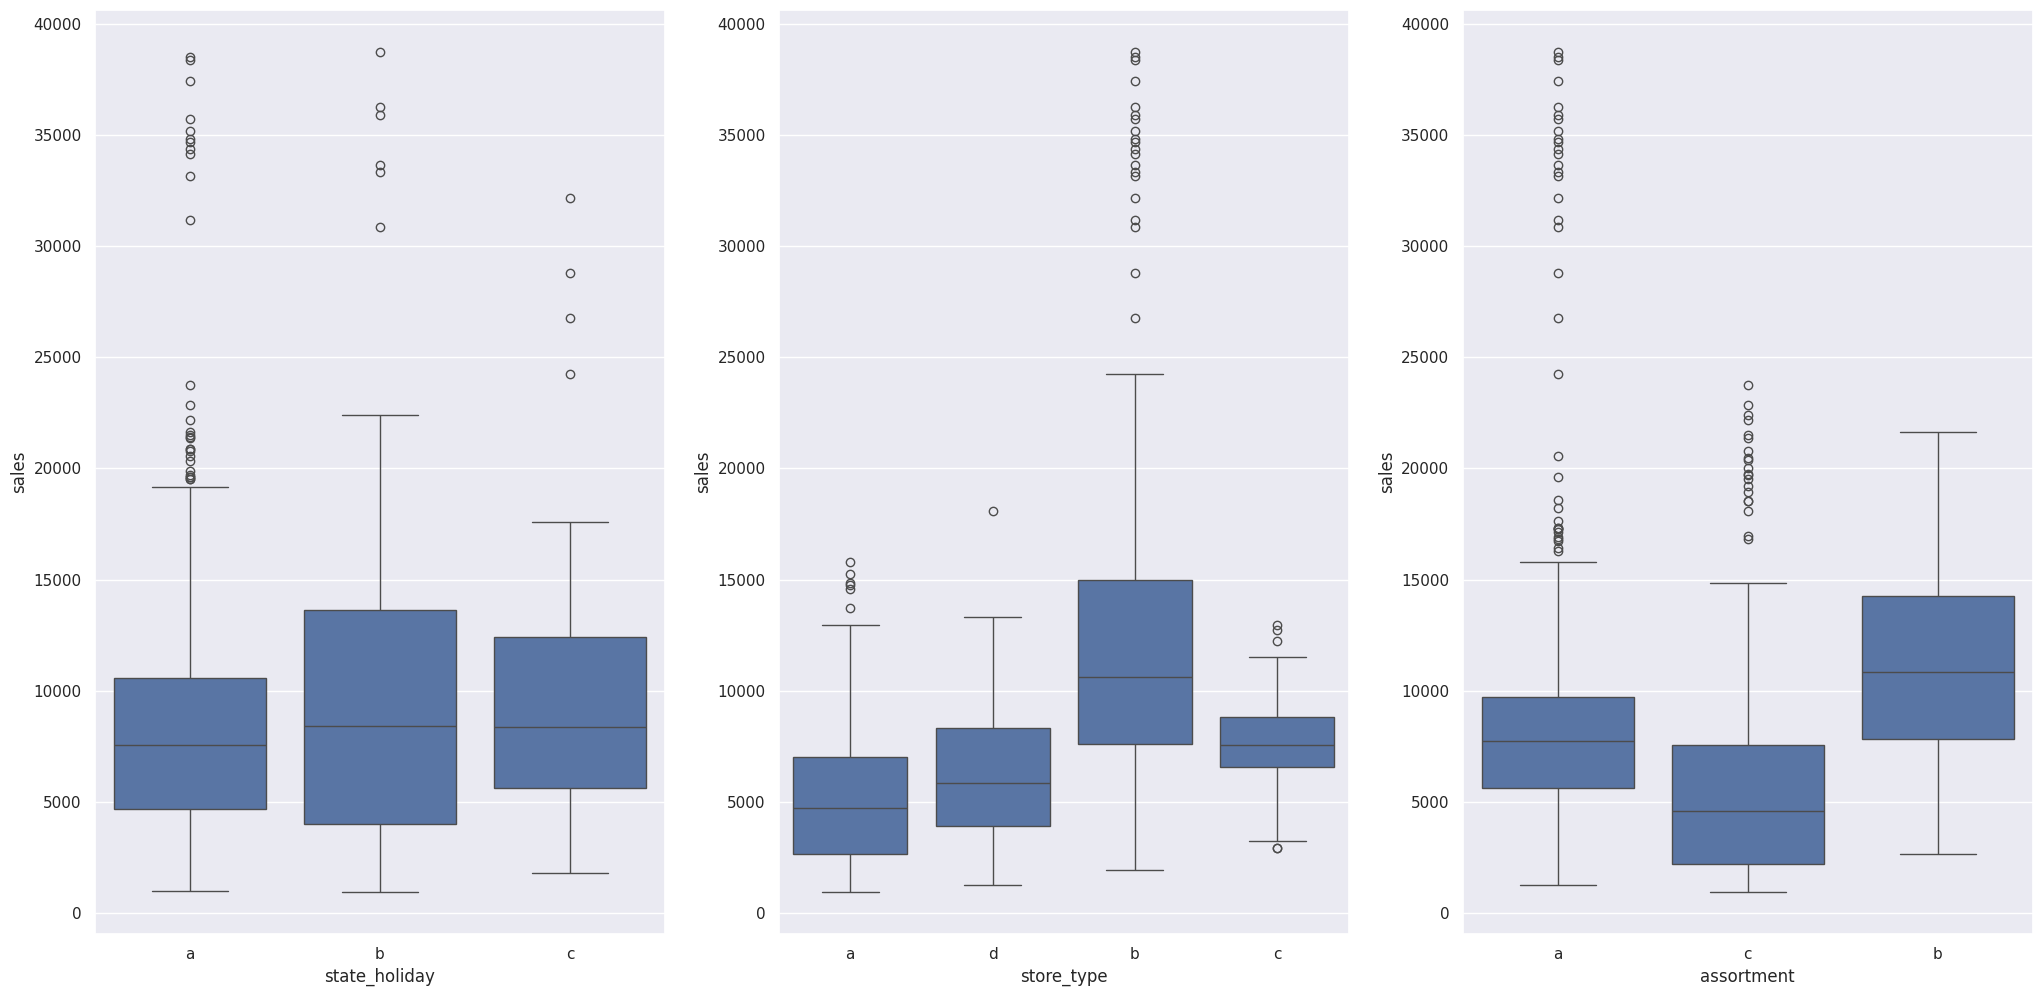

In [4]:
# Boxplots for sales against categorical attributes
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux)


## 6.2 State_Holiday (a = public holiday, b = Easter holiday, c = Christmas):

### 1.0 Median Sales:
- **1.1 Public Holiday (a)**:
    - The median sales for public holidays are between 4,000 and 6,000.
    - This suggests consistent consumer purchasing behavior during public holidays.
- **1.2 Easter Holiday (b)**:
    - The median sales for Easter holidays are also between 4,000 and 6,000.
    - This indicates stable sales patterns, with Easter not significantly impacting average sales.
- **1.3 Christmas (c)**:
    - The median sales for Christmas are similarly between 4,000 and 6,000.
    - This reflects that Christmas sales are aligned with other holiday sales in terms of central tendency.

### 2.0 Data Distribution:
- **2.1 Public Holiday (a)**:
    - The sales distribution is fairly symmetric, indicating a normal distribution.
    - The median is centrally located within the box.
    - This suggests a balanced sales performance with no significant deviation in consumer spending during public holidays.
- **2.2 Easter Holiday (b)**:
    - The sales distribution also appears symmetric and normally distributed, with the median close to the center of the box.
    - This indicates stable sales, with Easter not significantly impacting the average sales pattern.
- **2.3 Christmas (c)**:
    - The sales distribution is right-skewed, with the median close to the lower quartile (Q1).
    - This suggests that a larger number of sales figures are lower, with fewer higher sales values pulling the distribution to the right.
    - This skewness implies that while many stores experience lower sales, a few have exceptionally high sales, possibly due to targeted promotions or high-value items.

### 3.0 Interquartile Range (IQR):
- **3.1 Public Holiday (a)**:
    - The IQR is relatively smaller, indicating less variability in sales compared to Easter and Christmas.
    - This suggests that sales are more predictable and consistent during public holidays.
- **3.2 Easter Holiday (b)**:
    - The IQR is larger, suggesting more variability in sales.
    - This could indicate varied consumer spending behavior, possibly influenced by differing regional or cultural significance of Easter.
- **3.3 Christmas (c)**:
    - The IQR is also larger, but less than Easter, indicating moderate variability.
    - This reflects diverse consumer spending patterns during Christmas, likely influenced by gift purchases and holiday preparations.

### 4.0 Whiskers and Outliers:
- **4.1 Public Holiday (a)**:
    - The whiskers are shorter, but there are many outliers above the upper whisker, indicating numerous higher-than-expected sales values.
    - This suggests that certain stores may experience sporadic high sales, possibly due to special events or promotions.
- **4.2 Easter Holiday (b)**:
    - The whiskers extend further, showing a wider range of non-outlier sales values, with fewer outliers compared to public holidays.
    - This indicates a broader range of sales performances with fewer extreme values, reflecting a more stable market.
- **4.3 Christmas (c)**:
    - The whiskers are shorter, with a moderate number of outliers.
    - The right-skew suggests some exceptionally high sales values pulling the distribution to the right.
    - This indicates occasional high sales peaks, likely driven by festive shopping sprees.

### 5.0 Insights on Outliers:
- **5.1 Public Holiday (a)**:
    - Public holidays show a significant number of outliers, suggesting that sales can vary widely on these days, with many instances of unusually high sales.
    - This variability may be due to specific regional events or store-level promotions that attract more customers.
- **5.2 Easter Holiday (b)**:
    - Easter holidays have fewer outliers, indicating that while sales are variable, extreme values are less common.
    - This consistency may be due to more uniform consumer behavior during Easter.
- **5.3 Christmas (c)**:
    - Christmas holidays have moderate outliers, reflecting occasional high sales.
    - This suggests that while most stores have moderate sales, some experience significant spikes, likely due to last-minute gift shopping or major holiday discounts.

### Conclusion:
The boxplot reveals that while the median sales are similar across the three types of state holidays, the distribution and variability of sales differ. Public holidays show more variability and a higher number of outliers, Easter holidays display wider variability, and Christmas sales are right-skewed with moderate variability and outliers. These insights can help businesses tailor their strategies to optimize sales during different holiday periods.



## 6.3 store_type: differentiates between 4 different store models: a, b, c, d

### 1.0 Median Sales:
- **1.1 Store Type (a)**:
    - The median sales for store type a are between 4,000 and 6,000.
    - This suggests consistent consumer purchasing behavior for type a stores.
- **1.2 Store Type (d)**:
    - The median sales for store type d are slightly lower, also between 4,000 and 6,000.
    - This indicates similar but slightly more variable sales patterns compared to type a stores.
- **1.3 Store Type (b)**:
    - The median sales for store type b are higher, around 10,000.
    - This reflects that type b stores have stronger sales performance, potentially due to larger size, better location, or more product offerings.
- **1.4 Store Type (c)**:
    - The median sales for store type c are between 4,000 and 6,000.
    - This suggests that type c stores have moderate sales similar to type a and d, but less than type b.

### 2.0 Data Distribution:
- **2.1 Store Type (a)**:
    - The sales distribution is fairly symmetric, indicating a normal distribution.
    - The median is centrally located within the box.
    - This suggests a balanced sales performance with no significant deviation in consumer spending during public holidays.
- **2.2 Store Type (d)**:
    - The sales distribution also appears symmetric and normally distributed, with the median close to the center of the box.
    - This indicates stable sales, with store type d not significantly impacting the average sales pattern.
- **2.3 Store Type (b)**:
    - The sales distribution is more variable, with a wider range and more outliers.
    - This suggests that type b stores experience higher sales variability, possibly due to larger customer bases or more promotional activities.
- **2.4 Store Type (c)**:
    - The sales distribution is slightly right-skewed, with the median closer to the lower quartile (Q1).
    - This suggests that a larger number of sales figures are lower, with fewer higher sales values pulling the distribution to the right.
    - This skewness implies that while many stores experience lower sales, a few have exceptionally high sales, possibly due to targeted promotions or high-value items.

### 3.0 Interquartile Range (IQR):
- **3.1 Store Type (a)**:
    - The IQR is relatively smaller, indicating less variability in sales compared to type b.
    - This suggests that sales are more predictable and consistent for type a stores.
- **3.2 Store Type (d)**:
    - The IQR is similar to type a, suggesting moderate variability in sales.
    - This indicates stable sales patterns for type d stores.
- **3.3 Store Type (b)**:
    - The IQR is larger, indicating greater variability in sales.
    - This reflects diverse consumer spending patterns, likely influenced by store size, location, or product range.
- **3.4 Store Type (c)**:
    - The IQR is moderate, less than type b but similar to type a and d.
    - This suggests moderate variability in sales, with some stores experiencing higher sales peaks.

### 4.0 Whiskers and Outliers:
- **4.1 Store Type (a)**:
    - The whiskers are shorter, but there are many outliers above the upper whisker, indicating numerous higher-than-expected sales values.
    - This suggests that certain stores may experience sporadic high sales, possibly due to special events or promotions.
- **4.2 Store Type (d)**:
    - The whiskers extend further, showing a wider range of non-outlier sales values, with fewer outliers compared to type a.
    - This indicates a broader range of sales performances with fewer extreme values, reflecting a more stable market.
- **4.3 Store Type (b)**:
    - The whiskers are longer, indicating a wider range of sales values.
    - The higher number of outliers suggests occasional high sales peaks, likely driven by promotions or high-demand products.
- **4.4 Store Type (c)**:
    - The whiskers are shorter, with fewer outliers compared to type a and b.
    - This indicates occasional high sales peaks but generally consistent sales.

### 5.0 Insights on Outliers:
- **5.1 Store Type (a)**:
    - Store type a shows a significant number of outliers, suggesting that sales can vary widely, with many instances of unusually high sales.
    - This variability may be due to specific regional events or store-level promotions that attract more customers.
- **5.2 Store Type (d)**:
    - Store type d has fewer outliers, indicating that while sales are variable, extreme values are less common.
    - This consistency may be due to more uniform consumer behavior during Easter.
- **5.3 Store Type (b)**:
    - Store type b has a high number of outliers, reflecting occasional high sales.
    - This suggests that while most stores have moderate sales, some experience significant spikes, likely due to last-minute gift shopping or major holiday discounts.
- **5.4 Store Type (c)**:
    - Store type c has moderate outliers, reflecting occasional high sales.
    - This suggests that while most stores have moderate sales, some experience significant spikes, likely due to last-minute gift shopping or major holiday discounts.

### Conclusion:
The boxplot reveals that while the median sales are similar across the three types of state holidays, the distribution and variability of sales differ. Public holidays show more variability and a higher number of outliers, Easter holidays display wider variability, and Christmas sales are right-skewed with moderate variability and outliers. These insights can help businesses tailor their strategies to optimize sales during different holiday periods.

## 6.4 Assortment - describes an assortment level: a = basic, b = extra, c = extended

### 1.0 Median Sales:
- **1.1 Assortment (a)**:
    - The median sales for basic assortments are between 4,000 and 6,000.
    - This suggests consistent consumer purchasing behavior for basic assortments.
- **1.2 Assortment (c)**:
    - The median sales for extended assortments are slightly lower, around 4,000.
    - This indicates similar but slightly lower sales patterns compared to basic assortments.
- **1.3 Assortment (b)**:
    - The median sales for extra assortments are higher, around 10,000.
    - This reflects that extra assortments have stronger sales performance, potentially due to a wider range of products or better selection.

### 2.0 Data Distribution:
- **2.1 Assortment (a)**:
    - The sales distribution is fairly symmetric, indicating a normal distribution.
    - The median is centrally located within the box.
    - This suggests a balanced sales performance with no significant deviation in consumer spending for basic assortments.
- **2.2 Assortment (c)**:
    - The sales distribution also appears symmetric and normally distributed, with the median close to the center of the box.
    - This indicates stable sales, with extended assortments not significantly impacting the average sales pattern.
- **2.3 Assortment (b)**:
    - The sales distribution is more variable, with a wider range and more outliers.
    - This suggests that extra assortments experience higher sales variability, possibly due to a larger customer base or more promotional activities.

### 3.0 Interquartile Range (IQR):
- **3.1 Assortment (a)**:
    - The IQR is relatively smaller, indicating less variability in sales compared to extra assortments.
    - This suggests that sales are more predictable and consistent for basic assortments.
- **3.2 Assortment (c)**:
    - The IQR is similar to basic assortments, suggesting moderate variability in sales.
    - This indicates stable sales patterns for extended assortments.
- **3.3 Assortment (b)**:
    - The IQR is larger, indicating greater variability in sales.
    - This reflects diverse consumer spending patterns, likely influenced by the wider product range in extra assortments.

### 4.0 Whiskers and Outliers:
- **4.1 Assortment (a)**:
    - The whiskers are shorter, but there are many outliers above the upper whisker, indicating numerous higher-than-expected sales values.
    - This suggests that certain stores may experience sporadic high sales, possibly due to special events or promotions.
- **4.2 Assortment (c)**:
    - The whiskers extend further, showing a wider range of non-outlier sales values, with fewer outliers compared to basic assortments.
    - This indicates a broader range of sales performances with fewer extreme values, reflecting a more stable market.
- **4.3 Assortment (b)**:
    - The whiskers are longer, indicating a wider range of sales values.
    - The higher number of outliers suggests occasional high sales peaks, likely driven by promotions or high-demand products.

### 5.0 Insights on Outliers:
- **5.1 Assortment (a)**:
    - Basic assortments show a significant number of outliers, suggesting that sales can vary widely, with many instances of unusually high sales.
    - This variability may be due to specific regional events or store-level promotions that attract more customers.
- **5.2 Assortment (c)**:
    - Extended assortments have fewer outliers, indicating that while sales are variable, extreme values are less common.
    - This consistency may be due to more uniform consumer behavior.
- **5.3 Assortment (b)**:
    - Extra assortments have a moderate number of outliers, reflecting occasional high sales.
    - This suggests that while most stores have moderate sales, some experience significant spikes, likely due to last-minute shopping or major promotions.

### Conclusion:
The boxplot reveals that while the median sales are similar across the three types of assortments, the distribution and variability of sales differ. Basic assortments show more variability and a higher number of outliers, extended assortments display moderate variability, and extra assortments have the highest median sales with significant variability and outliers. These insights can help businesses tailor their strategies to optimize sales based on assortment levels.



# 7.0 FEATURE ENGINEERING


In [5]:
df2=df1.copy()

## 7.1 Feature Creation

In [6]:
#Create year column
df2['year']=df2['date'].dt.year

#Create month column
df2['month']=df2['date'].dt.month

#Create year column
df2['day']=df2['date'].dt.day

#Create week of year column
df2['week_of_year']=df2['date'].dt.isocalendar().week

#Create year week column
df2['year_week']=df2['date'].dt.strftime('%Y-%U')

#Create competition since column
df2['competition_since']=df2.apply(
                                    lambda x: datetime.datetime(year=x['competition_open_since_year'],
                                                                month=x['competition_open_since_month'],
                                                                day=1), axis=1)

df2['competition_time_month']=((df2['date']-df2['competition_since'])/30).apply(
                                                                                lambda x: x.days).astype(int)

#Create promo since column
df2['promo_since']=df2['promo2_since_year'].astype(str)+'-'+df2['promo2_since_week'].astype(str)

df2['promo_since']=df2['promo_since'].apply(
                                            lambda x: datetime.datetime.strptime(x+'-1', '%Y-%W-%w')-datetime.timedelta(days=7))

#Create promo time week column
df2['promo_time_week'] = ((df2['date'] - df2['promo_since']) / 7).apply(
                                                                                lambda x: x.days).astype(int)

#change assortment classification
df2['assortment']=df2['assortment'].apply(
                                            lambda x: 'basic' if x =='a' else 'extra' if x == 'b' else 'extended')

#change state holiday classification
df2['state_holiday']=df2['state_holiday'].apply(
                                                lambda x: 'public_holiday' if x== 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x=='c' else 'regular_day')


# 8.0 Variables filtering

In [7]:
df3=df2.copy()

## 8.1 Filtering lines

In [8]:
# Filter df3 to include only rows where 'open' is not equal to 0 and 'sales' is greater than 0
df3=df3[(df3['open'] !=0)&(df3['sales']>0)]


## 8.2 Filtering Columns

In [9]:
cols_drop=['customers', 'open', 'promo_interval', 'month_map']
df3=df3.drop(cols_drop,axis=1)

# customers: The model should be able to predict sales without having direct information about the number of customers,
# as this data might not be available in a real-world scenario where predictions are required.

# open: This column indicates whether a store was open or closed. If this information is already encoded in the sales data
# (e.g., sales are zero when the store is closed), this column may be redundant

#promo_interval:  If the information in promo_interval has already been processed into more useful features (e.g., is_promo),
# then keeping the original promo_interval column might be unnecessary.

#month_map:This column might have been created temporarily to facilitate the creation of another feature (e.g., is_promo).
# Once the new feature is created, the month_map column might no longer be needed.

In [10]:
df4=df3.copy()
#exporting df4
df4.to_csv('../data/df4.csv', index=False)

In [11]:
df4.dtypes

store                                    int64
day_ofyear                               int64
date                            datetime64[ns]
sales                                    int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
is_promo                                 int64
year                                     int32
month                                    int32
day                                      int32
week_of_year                            UInt32
year_week                               object
competition_s

In [12]:
dff_sorted=df4.sort_values(by='sales', ascending=True).head(5)
dff_sorted

,store,day_ofyear,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
273387,652,6,2014-11-22,46,0,regular_day,0,a,basic,20390.0,11,2014,0,47,2014,0,2014,11,22,47,2014-46,2014-11-01,0,2014-11-17,0
202712,898,6,2015-01-31,124,0,regular_day,0,a,basic,18540.0,1,2015,0,5,2015,0,2015,1,31,5,2015-04,2015-01-01,1,2015-01-26,0
846592,1093,1,2013-06-03,133,1,regular_day,0,c,extended,10450.0,6,2009,0,23,2013,0,2013,6,3,23,2013-22,2009-06-01,48,2013-06-03,0
941137,863,7,2013-03-10,286,0,regular_day,0,a,extended,21370.0,11,2010,0,10,2013,0,2013,3,10,10,2013-10,2010-11-01,28,2013-03-04,0
996161,137,6,2013-01-19,297,0,regular_day,0,a,basic,1730.0,7,2015,1,40,2014,1,2013,1,19,3,2013-02,2015-07-01,-30,2014-09-29,-89


In [13]:
zeros_df4=(df4['sales']==0).sum()
print(zeros_df4)

0
